# FINAL PROJECT
### Customer Churn Analysis
Customer churn refers to the number of customers who stop using a company's services over a given period of time. It is an important metric because retaining existing customers is often less costly than acquiring new ones. High churn rates potetially signal dissatisfaction with many of the company's offerings, leading to a negative impact on revenue and growth. The overall goal for analyzing churn is to identify at-risk customers early and take action to improve customer experience.

This project will analyze the Telco Customer Churn dataset (https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data) for potenital churn patterns, and attempt to predict the most at-risk customers.

In [ ]:
! pip install -r requirements.txt

# 1. Data
The dataset contains 7,043 customer records from a telecommunications company with 21 features and a target variable called 'Churn'


### All Features 
- <b>Churn</b>: Customer churned? (Yes/No)
- <b>CustomerID</b>: Customer’s Unique ID
- <b>gender</b>: Customer’s gender (Male/Female)
- <b>SeniorCitizen</b>: Whether customer is a senior citizen (1=Yes, 0=No)
- <b>Partner</b>: Whether customer has a partner (Yes/No).
- <b>Dependents</b>: Whether customer has dependents (Yes/No).
- <b>tenure</b>: Number of months person was customer
- <b>PhoneService</b>: Does customer have phone service (Yes/No).
- <b>MultipleLines</b>: Whether customer has multiple lines (Yes, No, No phone service).
- <b>InternetService</b>: Type of internet service (DSL, Fiber optic, None).
- <b>Contract</b>: Contract type (Month-to-month, One year, Two year).
- <b>PaperlessBilling</b>: Billing is paperless? (Yes/No).
- <b>PaymentMethod</b>: Payment method (Electronic check, mailed check, ...).
- <b>MonthlyCharges</b>: Monthly amount charged to customer.
- <b>TotalCharges</b>: Total amount charged.
- <b>TechSupport</b>, <b>StreamingTV</b>, <b>StreamingMovies</b>, <b>OnlineSecurity</b>, <b>OnlineBackup</b>, <b>DeviceProtection</b>: Optional services
(Yes/No/No internet service).


<b>Numerical Features</b>: 'tenure', 'MonthlyCharges', 'TotalCharges'<br>
<b>Categorical Features</b>: 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService' 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod'<br>
<b>Target</b>: 'Churn'


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# visualize model comparison
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# save to dataframe and confirm you get data back
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 2. Data Cleaning with EDA
### Data Cleaning

Within the numerical features 'tenure', 'MonthlyCharges', 'TotalCharges' there were some anomolies that needed fixing:
1. Convert 'TotalCharges' to float to mirror 'MonthlyCharges'
2. On converting the column there were 11 TotalCharges rows with a blank space, those were filled with the median of 'TotalCharges' column
3. Upon visualization via Scatterplot of 'tenure' vs 'TotalCharges' an outlier was seen and removed



In [134]:


# check for duplicated rows
print(f"Duplicated rows: {df.duplicated().sum()}")

# recognize monthly charges and total charges should be same data type
# attempting to convert df['TotalCharges'] to type float reveals there are 11 empty strings (" ") in column 'TotalCharges'
# coerce errors and replace NaN with median
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"Number of rows with a blank space: {df['TotalCharges'].isna().sum()}")
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
print(f"Number of rows with a blank space: {df['TotalCharges'].isna().sum()}")





Duplicated rows: 0
Number of rows with a blank space: 11
Number of rows with a blank space: 0


### Visualize Features

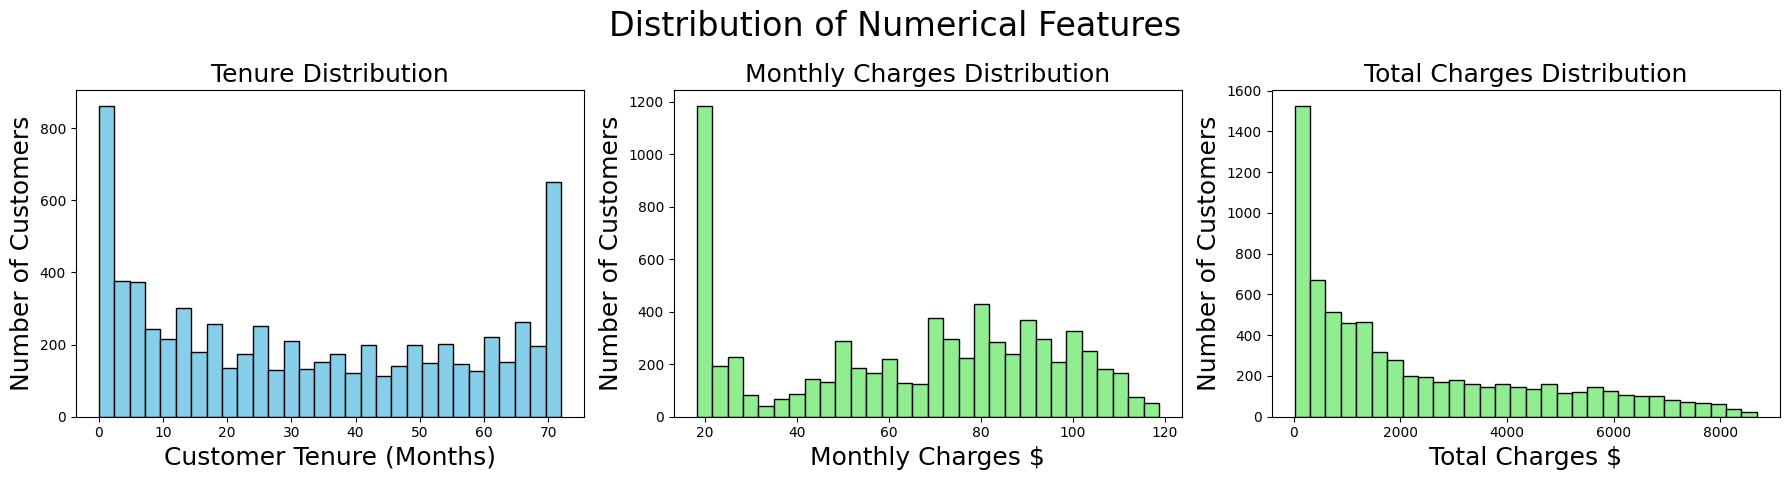

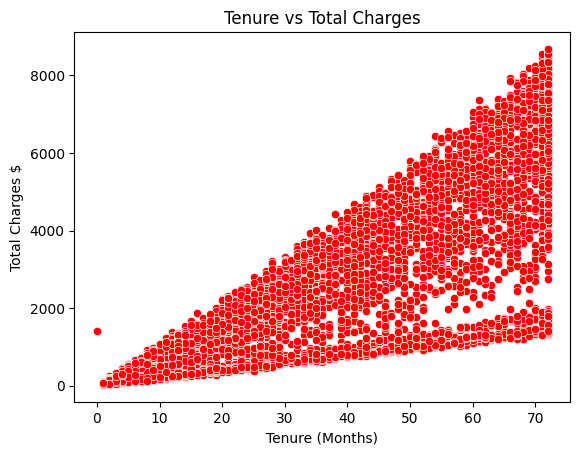

In [135]:

# Visualize numerical features
fig, ps = plt.subplots(1, 3, figsize=(18,5))

ps[0].hist(df['tenure'], bins=30, color='skyblue', edgecolor='black')
ps[0].set_title('Tenure Distribution', fontsize=18)
ps[0].set_xlabel('Customer Tenure (Months)', fontsize=18)
ps[0].set_ylabel('Number of Customers', fontsize=18)

ps[1].hist(df['MonthlyCharges'], bins=30, color='lightgreen', edgecolor='black')
ps[1].set_title('Monthly Charges Distribution', fontsize=18)
ps[1].set_xlabel('Monthly Charges $', fontsize=18)
ps[1].set_ylabel('Number of Customers', fontsize=18)

ps[2].hist(df['TotalCharges'], bins=30, color='lightgreen', edgecolor='black')
ps[2].set_title('Total Charges Distribution', fontsize=18)
ps[2].set_xlabel('Total Charges $', fontsize=18)
ps[2].set_ylabel('Number of Customers', fontsize=18)
fig.suptitle('Distribution of Numerical Features', fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

# shows an outlier, one big spender
sns.scatterplot(x='tenure', y='TotalCharges', color='red', data=df)
plt.title('Tenure vs Total Charges')
plt.xlabel('Tenure (Months)')
plt.ylabel('Total Charges $')
plt.show()





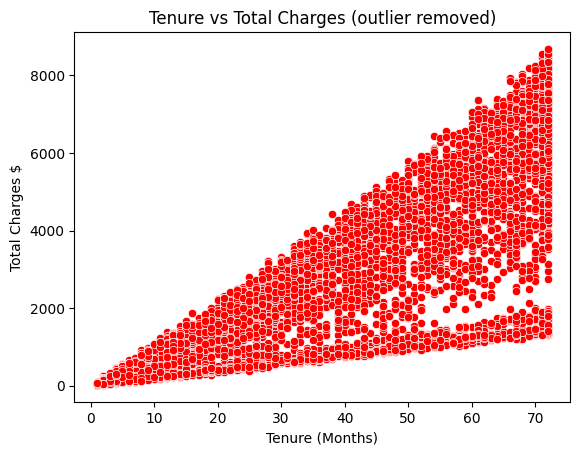

In [136]:
# clear the outlier
outlier = df[(df['tenure'] == 0) & (df['TotalCharges'] > 1000)]
df = df.drop(index=outlier.index)
sns.scatterplot(x='tenure', y='TotalCharges', color='red', data=df)
plt.title('Tenure vs Total Charges (outlier removed)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Total Charges $')
plt.show()


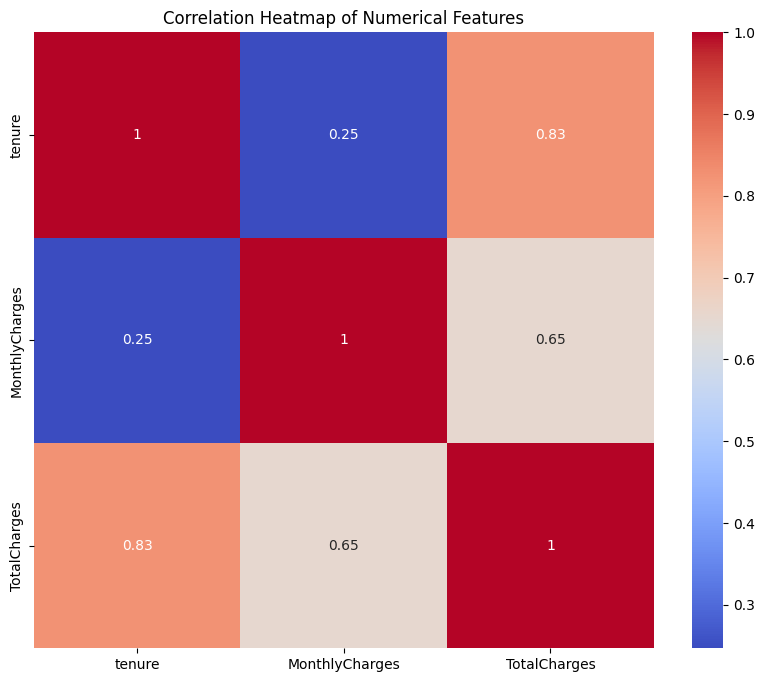

In [137]:
# correlation Analysis shows tenure vs total charges correlation 
plt.figure(figsize=(10,8))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

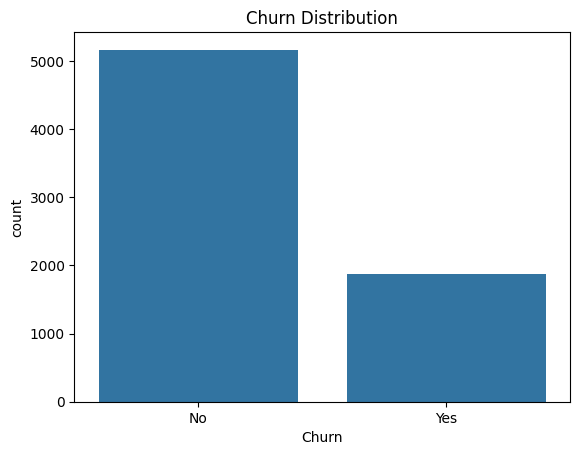

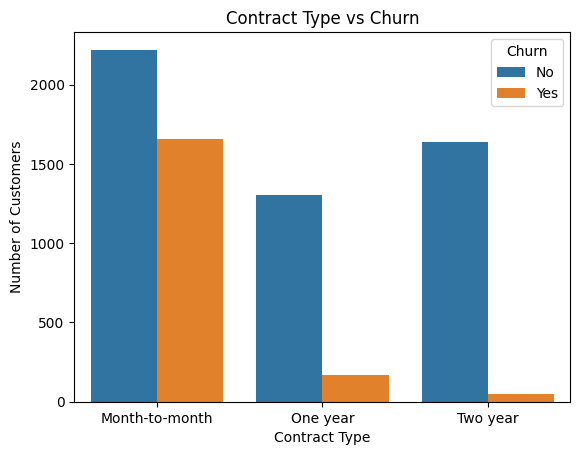

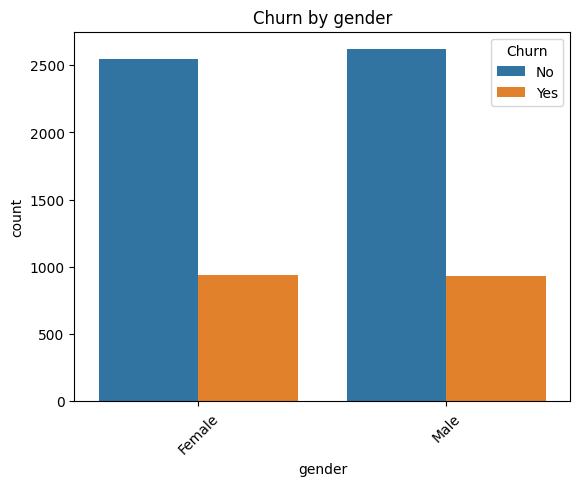

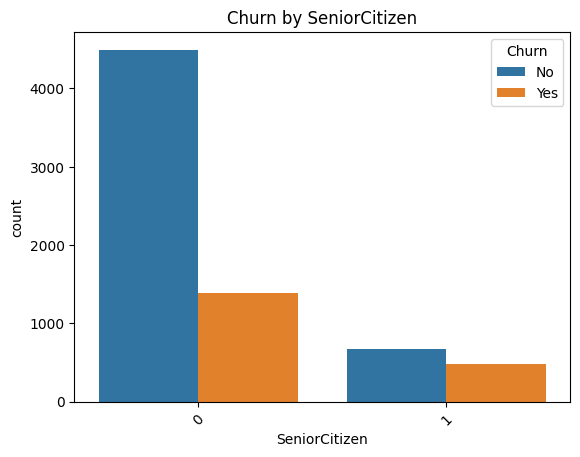

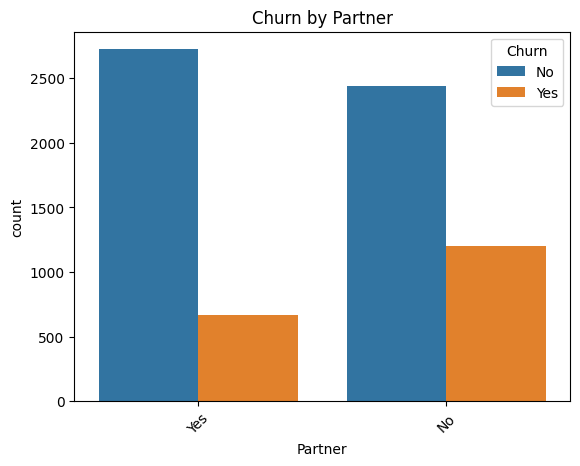

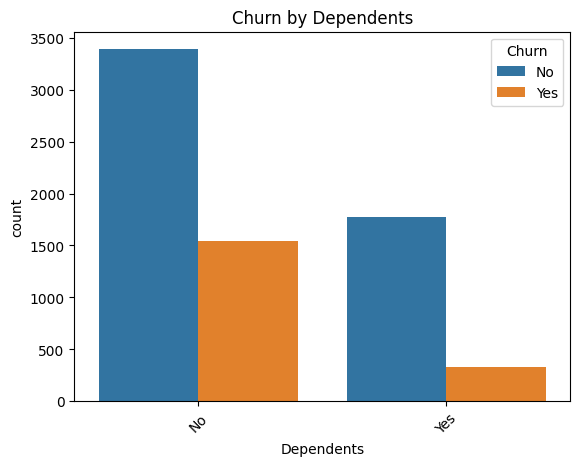

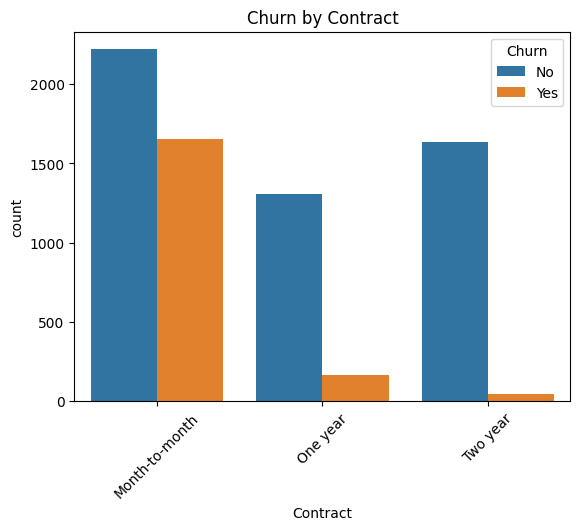

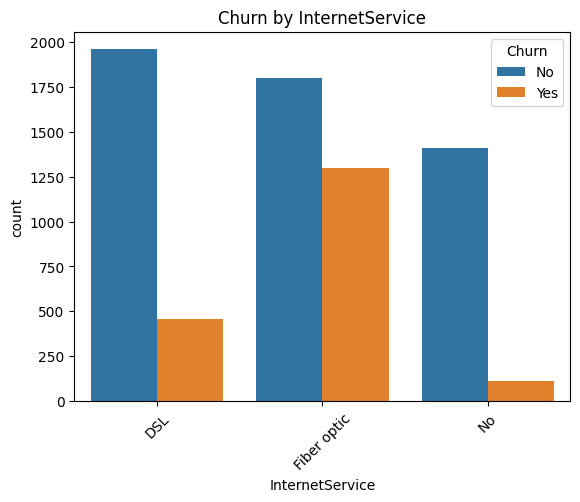

In [ ]:
# Visualize Categorical Features
# target 
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()
# anaylze smaller vs longer  financial commitments 
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract Type vs Churn')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()

# analayze categorical relationships
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract', 'InternetService']

for col in categorical_cols:
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=45)
    plt.show()


# 3. Models
This is a binary classification problem : Predict if a customer will churn "Yes" or "No" based on their features.<br>

Several supervised learning models were trained and compared, including Logistic Regression, Random Forest, Support Vector Machine (SVM), Decision Tree, K-Nearest Neighbors (KNN), and XGBoost. Based on the final evaluation metrics, Logistic Regression maintained the strongest overall performance with an F1 Score of 0.608 and the highest ROC AUC of 0.836, indicating reliable capability in distinguishing churners from non-churners.

However, after hyperparameter tuning and feature scaling, both Random Forest and XGBoost significantly improved, each achieving an F1 Score of 0.572.  XGBoost slightly surpassed Logistic Regression in ROC AUC (0.837), and both tree-based models showed improved recall (0.519 and 0.524, respectively). These recall values are critical when the business goal is to proactively identify customers likely to churn.

On the other hand, Decision Tree and KNN underperformed across all metrics, particularly in recall and precision, suggesting they may be more prone to overfitting in this dataset. Most models achieved a ROC AUC above 0.78, reinforcing that they generally differentiate well between churners and non-churners.

Feature collinearity was checked during EDA, and no problematic multicollinearity was detected. To prevent overfitting, especially in tree-based models, hyperparameters such as max_depth and min_samples_split were tuned, contributing to improved generalization performance in the Random Forest and XGBoost models.

In [139]:
# encode the target variable for better modeling 
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})


In [140]:
# encode categorical features
df_encoded = pd.get_dummies(df.drop('customerID', axis=1))

# scale numerical features
scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


### Train test split with model comparison

In [141]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# hyperparameter tuning #########
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# random Forest
grid = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid, 
                                n_iter=18, cv=5, scoring='f1', n_jobs=-1, random_state=42)
grid.fit(X_train, y_train)

print("best rf parameters:", grid.best_params_)
print("best rf F1 score:", grid.best_score_)


# support Vector Machine
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

# decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}

xgb_model = RandomizedSearchCV(XGBClassifier(eval_metric='logloss'), 
                                xgb_param_grid, n_iter=50, cv=5, scoring='f1', n_jobs=-1, random_state=42)
xgb_model.fit(X_train, y_train)



best rf parameters: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 10}
best rf F1 score: 0.5844445586839635


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='f1')

### Visualize model comparison
Create a model comparison chart for different metrics to track performance of our 6 models.

In [142]:

models = {
    'Logistic Regression': lr,
    'Random Forest': grid,
    'SVM': svm_model,
    'Decision Tree': dt_model,
    'KNN': knn_model,
    'XGBoost' : xgb_model
}
# displays model comparison chart
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        y_prob = None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    results.append({
        'Model': name,
        'Accuracy': round(accuracy, 3),
        'Precision': round(precision, 3),
        'Recall': round(recall, 3),
        'F1 Score': round(f1, 3),
        'ROC AUC': round(roc_auc, 3) if roc_auc is not None else 'N/A'
    })

results_table_df = pd.DataFrame(results)

print('____________________________ MODEL COMPARISON TABLE _____________________________')
print(results_table_df)


____________________________ MODEL COMPARISON TABLE _____________________________
                 Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
0  Logistic Regression     0.804      0.648   0.572     0.608    0.836
1        Random Forest     0.794      0.638   0.519     0.572    0.832
2                  SVM     0.791      0.638   0.495     0.557    0.783
3        Decision Tree     0.729      0.491   0.497     0.494    0.655
4                  KNN     0.761      0.547   0.586     0.566    0.778
5              XGBoost     0.792      0.630   0.524     0.572    0.837


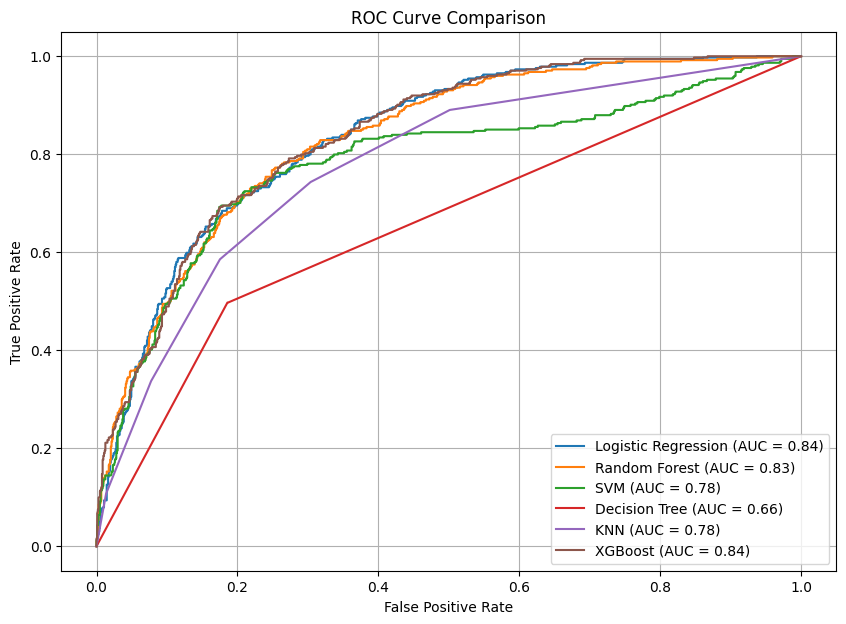

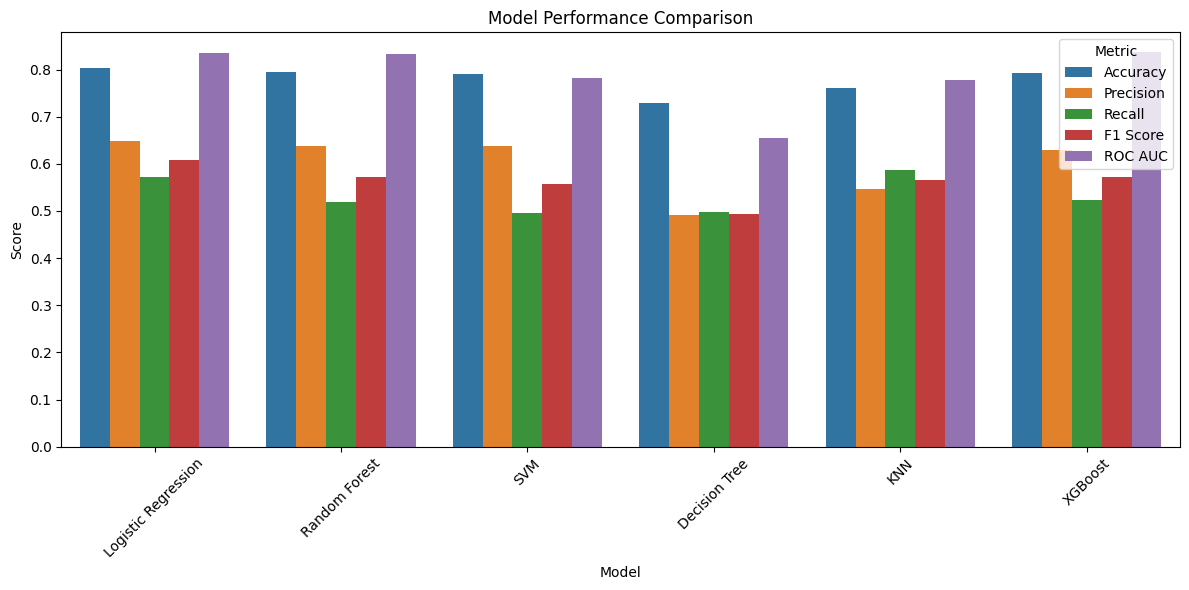

In [ ]:
#
# display model comparison visualizations
#
plt.figure(figsize=(10, 7))

for name, model in models.items():
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')
    except:
        pass

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
plt.figure(figsize=(12, 6))
results_melted = results_table_df.melt(id_vars='Model', value_vars=metrics_to_plot)
sns.barplot(x='Model', y='value', hue='variable', data=results_melted)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# 4. Conclusion

This project built a predictive model to determine whether a customer is likely to churn based on features. After data cleaning, EDA, preprocessing the dataset, one-hot encoding categorical variables and normalizing numerical features, we trained and evaluated six supervised learning models:

1. Logistic Regression  
2. Random Forest  
3. Support Vector Machine (SVM)  
4. Decision Tree  
5. K-Nearest Neighbors (KNN)  
6. XGBoost  

### Model Summary

| Model                | Accuracy | Precision | Recall | F1 Score | ROC AUC |
|---------------------|----------|-----------|--------|----------|---------|
| Logistic Regression | 0.804    | 0.648     | 0.572  | 0.608    | 0.836   |
| Random Forest       | 0.794    | 0.638     | 0.519  | 0.572    | 0.832   |
| SVM                 | 0.791    | 0.638     | 0.495  | 0.557    | 0.783   |
| Decision Tree       | 0.729    | 0.491     | 0.497  | 0.494    | 0.655   |
| KNN                 | 0.761    | 0.547     | 0.586  | 0.566    | 0.778   |
| XGBoost             | 0.792    | 0.630     | 0.524  | 0.572    | 0.837   |

### Key Findings

- **Logistic Regression** showed the best overall performance in terms of **ROC AUC (0.836)** and **F1 Score (0.608)**, demonstrating it as the balanced model in identifying churners while minimizing false positives/negatives.
- **XGBoost** was a close second, with competitive performance and the highest ROC AUC (0.837) of all models. It was able to capture more complex patterns in the data.
- **Random Forest** showed strong accuracy and AUC but had lower recall, suggesting it may miss actual churners, a major problem for our use case.
- **Decision Tree** and **KNN** underperformed, likely due to overfitting
- All models performed with ROC AUC scores above 0.75, indicating they are considered reasonable models and are capable of distinguishing churners from non-churners.

### Techniques

- We evaluated **feature multicollinearity** during EDA and found no significant problems. 
- To **reduce overfitting**, especially in the tree-based models, we applied hyperparameter tuning using RandomizedSearchCV on both Random Forest and XGBoost.
- **Hyperparameter tuning** improved recall and F1 scores, especially for XGBoost.
- Creating and comparing multiple models allowed for a well-rounded comparison and stronger justification of the final model selection.
- Feature significance were extracted from tree-based models to assess which features contributed most to the predictions—such as contract type, tenure, and monthly charges.

### Final Conclusion

Given its superior balance across all metrics and robustness, **Logistic Regression** is recommended as the final model for deployment in churn prediction. **XGBoost** may also be a contender if future improvements in recall or non-linear decision boundaries are necessary.